# Data Analysis and Visualization



# Understanding Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import os

1.extracting the data file(csv file)




In [ ]:
data = pd.read_csv('/content/sample_data/db_project/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


2.Basic table info

In [ ]:
a = data.shape[0]
b = data.shape[1]
print("There are {} Rows and {} Columns in the Data table. ".format(a,b))

There are 7787 Rows and 12 Columns in the Data table. 


In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

3.Dataset summary

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


4. Null Values

In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

5.Null Rate

In [ ]:
# Null Rate
for i in data.columns:
  null_rate = data[i].isna().sum() / len(data) * 100
  if null_rate > 0:
    print("{}'s null rate : {}%". format(i,round(null_rate,2)))

director's null rate : 30.68%
cast's null rate : 9.22%
country's null rate : 6.51%
date_added's null rate : 0.13%
rating's null rate : 0.09%


6.Dataset Description

In [ ]:
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# Data Cleaning

1.Detecting duplicates in the datasets

In [ ]:
dup = data.duplicated(['title','country','type','release_year'])
data = data.drop_duplicates(['title','country','type','release_year']) 

2.creating new column (number_of_cast)

In [ ]:
data['cast'] = data['cast'].replace(np.nan, 'null')
def counter(cast):
  if cast == 'null':
    return 0
  else:
    cast_list = cast.split(', ')
    length_cast = len(cast_list)
    return length_cast
data['number_of_cast'] = data['cast'].apply(counter)
data['cast'] = data['cast'].replace('null', np.nan) 

In [ ]:
data = data.reset_index(drop=True)

3. Replacing null value in "rating" with mode() 

In [ ]:
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

4. Replacing null value in "date_added" as january 1 that release year

In [ ]:
data['date_added']=data['date_added'].fillna('January 1, {}'.format(str(data['release_year'].mode()[0])))

5. Replacing null value in "country" with reference to the Genre

In [ ]:
for i,j in zip(data['country'].values,data.index):
  if i==np.nan:
    if ('Anime' in data.loc[j,'listed_in']) or ('anime' in data.loc[j,'listed_in']):
      df.loc[j,'country']='Japan'
    else:
      continue
  else:
    continue

6.Changing object type of date_added to datetime

In [ ]:
import re
months={
  'January':1,
  'February':2,
  'March':3,
  'April':4,
  'May':5,
  'June':6,
  'July':7,
  'August':8,
  'September':9,
  'October':10,
  'November':11,
  'December':12
}
date_list=[]
for i in data['date_added'].values:
    str1=re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+',i)
    str2=re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+',i)
    str3=re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)',i)
    date='{}-{}-{}'.format(str3[0],months[str1[0]],str2[0])
    date_list.append(date)

In [ ]:
data['clear_date'] = date_list
data = data.drop('date_added', axis=1)

In [ ]:
data['clear_date'] = data['clear_date'].astype('datetime64[ns]')

After cleaning datasets

In [ ]:
print("There are {} rows and {} columns after data cleaning".format(data.shape[0],data.shape[1]))

There are 7787 rows and 13 columns after data cleaning


In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'number_of_cast', 'clear_date'],
      dtype='object')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Exploration of TV shows and movie

1.Line graph to represent TV shows and movies

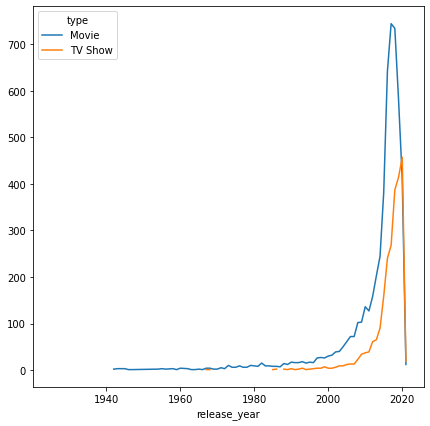

In [ ]:
data.pivot_table('show_id',index='release_year',columns='type',aggfunc='count').plot(figsize=(7, 7))

2. Groupby

In [ ]:
data.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,5377,5377,5214,4951,5147,5377,5377,5372,5377,5377,5377
TV Show,2410,2410,184,2118,2133,2400,2410,2408,2410,2410,2410


3.Pie chart

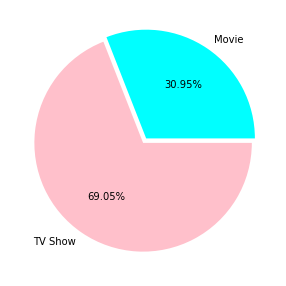

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(data['type'].value_counts().sort_values(),labels=data['type'].value_counts().index,explode=[0.05,0],autopct='%1.2f%%',colors=['Cyan','Pink'])
plt.show()

# Netflix Orginal vs Licensed

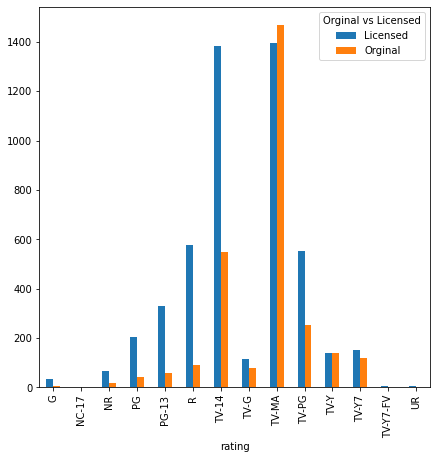

In [ ]:
new= data["date_added"].str.split(",", n = 1, expand = True) # we need year part of date only
data['added_date']=new[1]
data['added_date'].fillna(0,inplace=True)
data['added_date']=data['added_date'].astype(int)
data['release_year']=data['release_year'].astype(int)
data['Orginal vs Licensed']= data['release_year']==data['added_date'] #comparing both release year and added date
d = {True: 'Orginal', False: 'Licensed'}
data['Orginal vs Licensed']=data['Orginal vs Licensed'].map(d)

data.pivot_table('show_id',index='rating',columns='Orginal vs Licensed',aggfunc='count').plot(kind='bar',figsize=(7, 7))

# Top 5 in each data fields

In [ ]:
def TopCalulatorForSingleValue(a):
  top_values=data[a].value_counts().head(5)
  plt.plot(top_values,color='green')
  plt.xlabel("No of TV show/Movies", labelpad=14)
  plt.ylabel(a, labelpad=14)
  plt.title("Top 5 "+a, y=1.02);
from collections import Counter 
def TopCalulatorForMultipleValue(a):
  l=list()
  for i in data[a].dropna(): #We can drop null values because it will be unfair to replace it with sommeone else name
    for j in i.split(','):
      l.append(j.strip())
    d = Counter(l) 
    data_new=pd.DataFrame(d.items(), columns=['Category', 'Count'])
  return data_new.sort_values(by=['Count'],ascending=False).head(5)

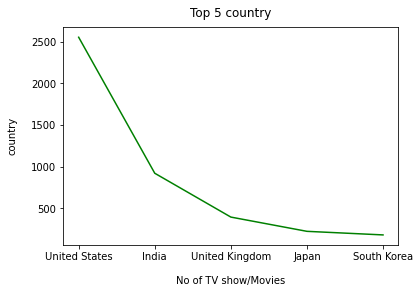

In [ ]:
TopCalulatorForSingleValue('country')

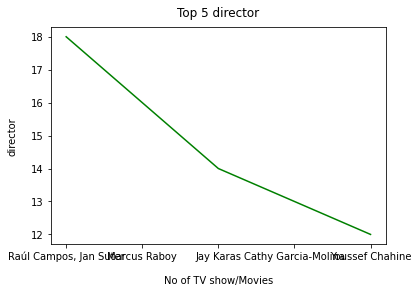

In [ ]:
TopCalulatorForSingleValue('director')

In [ ]:
TopCalulatorForMultipleValue('listed_in')

,Category,Count
4,International Movies,2437
3,Dramas,2106
15,Comedies,1471
0,International TV Shows,1199
13,Documentaries,786


In [ ]:
TopCalulatorForMultipleValue('cast')

,Category,Count
1290,Anupam Kher,42
3987,Shah Rukh Khan,35
714,Naseeruddin Shah,30
2191,Om Puri,30
2189,Akshay Kumar,29


# Top 10 countries producing popular content

In [ ]:
from collections import Counter
country_data = data['country']
#country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)

In [ ]:
from collections import Counter
country_data = data['country']
country_count=country_data.value_counts()
top_countries = country_count.head(10)
print(top_countries)

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 10 countries with most contents')

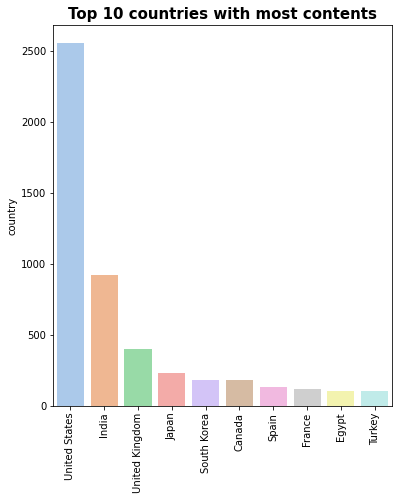

In [ ]:
from matplotlib import gridspec

fig = plt.figure(figsize=(10, 7))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top_countries.index, top_countries, ax=ax, palette="pastel")
ax.set_xticklabels(top_countries.index, rotation='90')
ax.set_title('Top 10 countries with most contents', fontsize=15, fontweight='bold')

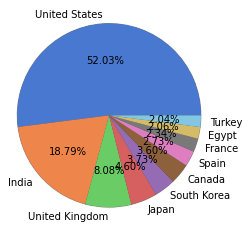

In [ ]:
ax1 = plt.subplot(gs[0])
ax1.pie(top_countries, labels=top_countries.index, shadow=True, startangle=0, colors=sns.color_palette("muted", n_colors=10),autopct='%1.2f%%', radius=5000)
ax1.axis('equal') 

plt.show()


# Top 10 Genre in Movies and TV shows

In [ ]:
data_tv = data[data["type"] == "TV Show"]
data_movies = data[data["type"] == "Movie"]

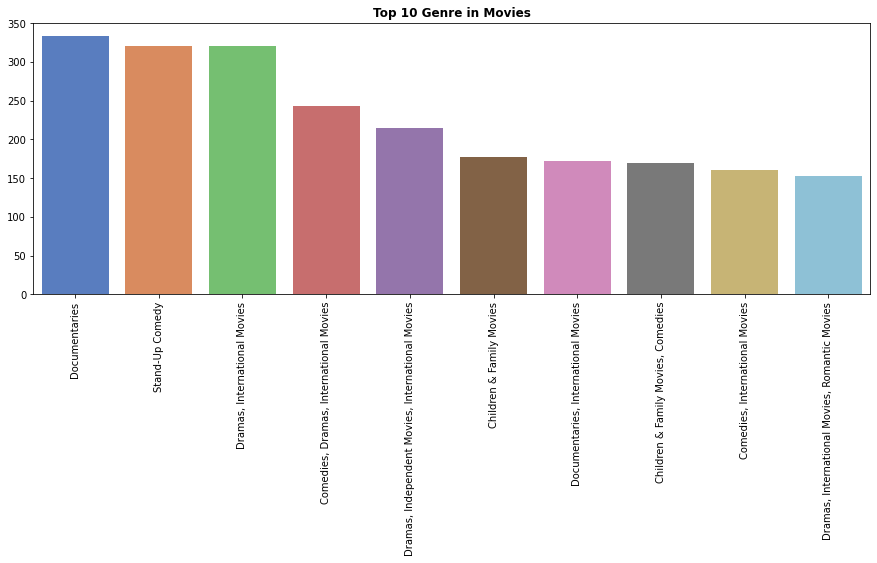

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = data_movies["listed_in"].value_counts().head(10).index,y = data_movies["listed_in"].value_counts().head(10).values,palette="muted")
plt.xticks(rotation=90)
plt.title("Top 10 Genre in Movies",fontweight="bold")
plt.show()

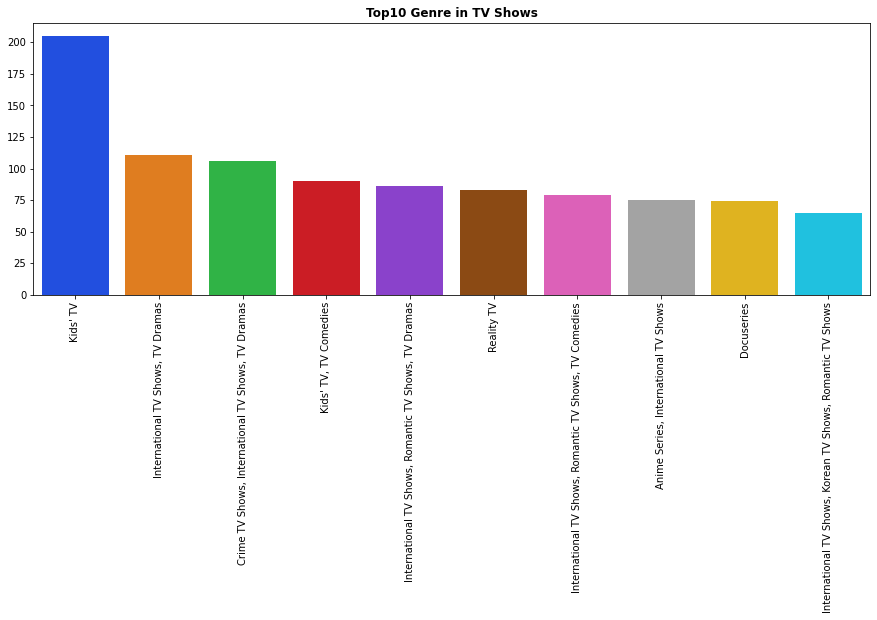

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = data_tv["listed_in"].value_counts().head(10).index,y = data_tv["listed_in"].value_counts().head(10).values,palette="bright")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

# Top 20 artist present in Netflix

In [ ]:
data['cast'] = data['cast'].astype(str)
data['cast_name'] = data['cast'].apply(lambda x :   x.replace(' ,',',').replace(', ',',').split(',')) 
cast_count = []
for i in data['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

data_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]

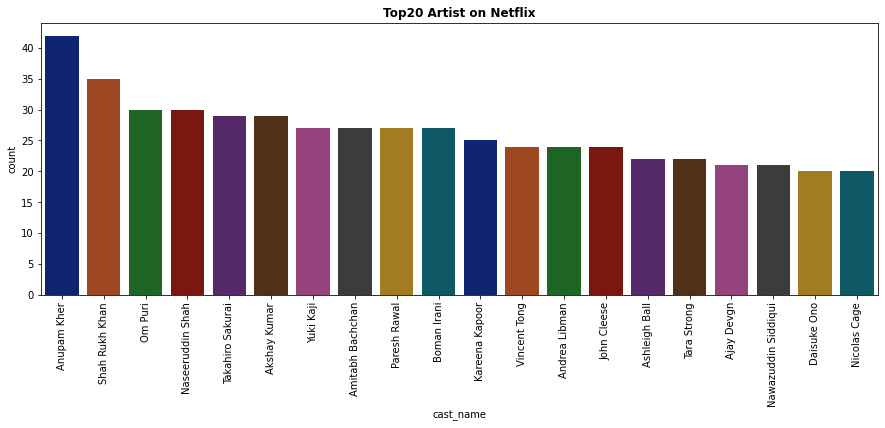

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=data_cast_count,palette="dark")
plt.title("Top20 Artist on Netflix",fontweight="bold")
plt.xticks(rotation=90)
plt.show()

# Contents added over year and month

Added over the year

In [ ]:
import plotly.graph_objects as go
data_content = data['release_year'].value_counts().reset_index().rename(columns = {'release_year' : 'count', 'index' : 'release_year'}).sort_values('release_year')
data_content['percent'] = data_content['count'].apply(lambda x : 100*x/sum(data_content['count']))


data_tv1 = data_tv['release_year'].value_counts().reset_index().rename(columns = {'release_year' : 'count', 'index' : 'release_year'}).sort_values('release_year')
data_tv1['percent'] = data_tv1['count'].apply(lambda x : 100*x/sum(data_tv1['count']))


data_movies1 = data_movies['release_year'].value_counts().reset_index().rename(columns = {'release_year' : 'count', 'index' : 'release_year'}).sort_values('release_year')
data_movies1['percent'] = data_movies1['count'].apply(lambda x : 100*x/sum(data_movies1['count']))

t1 = go.Scatter(x=data_movies1['release_year'], y=data_movies1["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=data_tv1['release_year'], y=data_tv1["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=data_content['release_year'], y=data_content["count"], name="Total Contents", marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Added over a month

In [ ]:

data["date_added"] = pd.to_datetime(data['date_added'])

data['month_added']=data['date_added'].dt.month
data['month_name_added']=data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year

In [ ]:
data_tv = data[data["type"] == "TV Show"]
data_movies = data[data["type"] == "Movie"]

In [ ]:
import plotly.graph_objects as go
data_content = data[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
data_content['percent'] = data_content['count'].apply(lambda x : 100*x/sum(data_content['count']))


data_tv2 = data_tv[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
data_tv2['percent'] = data_tv2['count'].apply(lambda x : 100*x/sum(data_tv2['count']))


data_movies2 = data_movies[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
data_movies2['percent'] = data_movies2['count'].apply(lambda x : 100*x/sum(data_movies2['count']))

t1 = go.Scatter(x=data_movies2['month_name_added'], y=data_movies2["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=data_tv2['month_name_added'], y=data_tv2["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=data_content['month_name_added'], y=data_content["count"], name="Total Contents", marker=dict(color="Brown"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over a month", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Genre Distribution

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer 

def relation_heatmap(df, title):
  data['genre'] = data['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
  Types = []
  for i in data['genre']: Types += i
  Types = set(Types)
  print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
  test = data['genre']
  mlb = MultiLabelBinarizer()
  res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
  corr = res.corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  fig, ax = plt.subplots(figsize=(10, 7))
  pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,cbar_kws={"shrink": 0.6})
  plt.show()

There are 42 types in the Netflix Movie Dataset


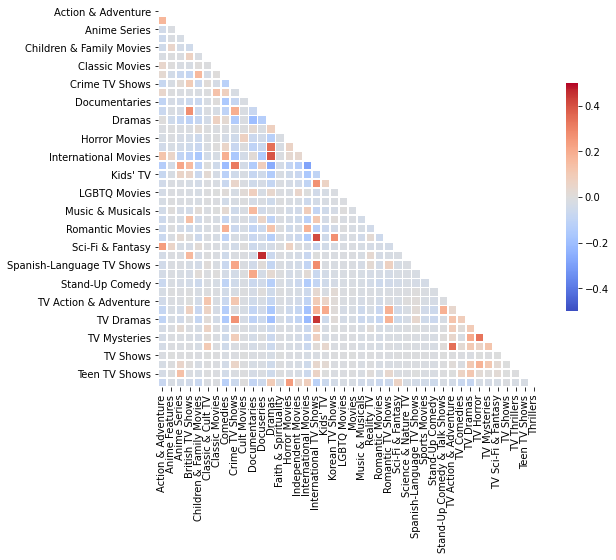

In [ ]:
relation_heatmap(data_movies, 'Movie')

There are 42 types in the Netflix TV Show Dataset


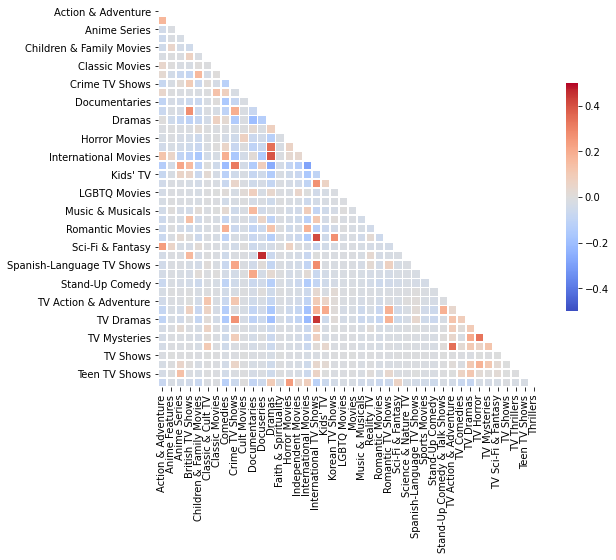

In [ ]:
relation_heatmap(data_tv, 'TV Show')

# Rating Distribution

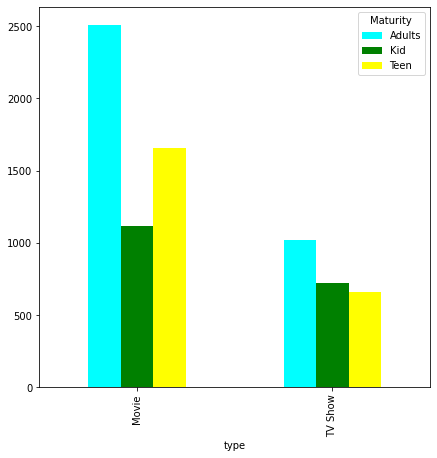

In [ ]:
d={'TV-Y':"Kid", 'TV-Y7':"Kid", 'G':"Kid", 'TV-G':"Kid", 'PG':"Kid", 'TV-PG':"Kid",'PG-13':"Teen", 'TV-14':"Teen",'TV-MA':"Adults",'R':"Adults",'NC-17':"Adults"}
data['Maturity']=data['rating'].map(d)
data.pivot_table('rating',index='type',columns='Maturity',aggfunc='count').plot(kind='bar',figsize=(7, 7),color=["cyan","green","yellow"])

Recommendation engine

In [ ]:
import networkx as nx
import math as math
import time 
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]

In [ ]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day

In [ ]:
data['directors'] = data['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
data['categories'] = data['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
data['actors'] = data['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
data['countries'] = data['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,directors,categories,actors,countries
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,14.0,[],"[International TV Shows, TV Dramas, TV Sci-Fi ...","[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil]
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,23.0,[Jorge Michel Grau],"[Dramas, International Movies]","[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,20.0,[Gilbert Chan],"[Horror Movies, International Movies]","[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore]
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,16.0,[Shane Acker],"[Action & Adventure, Independent Movies, Sci-F...","[Elijah Wood, John C. Reilly, Jennifer Connell...",[United States]
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,1.0,[Robert Luketic],[Dramas],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",[United States]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

# Build the tfidf matrix with the descriptions
start_time = time.time()
text_content = data['description']
vector = TfidfVectorizer(max_df=0.4,         # drop words that occur in more than X percent of documents
                             min_df=1,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)

# Clustering  Kmeans
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

# print the centers of the clusters
# for i in range(0,k):
#     word_list=[]
#     print("cluster%d:"% i)
#     for j in centers[i,:10]:
#         word_list.append(terms[j])
#     print(word_list) 
    
request_transform = vector.transform(data['description'])
# new column cluster based on the description
data['cluster'] = kmeans.predict(request_transform) 

data['cluster'].value_counts().head()

12     7482
21       16
72        5
38        5
163       4
Name: cluster, dtype: int64

In [ ]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]  

In [ ]:
G = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in data.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
#    G.add_node(rowi['cluster'],label="CLUSTER")
#    G.add_edge(rowi['title'], rowi['cluster'], label="DESCRIPTION")
    for element in rowi['actors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['categories']:
        G.add_node(element,label="CAT")
        G.add_edge(rowi['title'], element, label="CAT_IN")
    for element in rowi['directors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        G.add_node(element,label="COU")
        G.add_edge(rowi['title'], element, label="COU_IN")
    
    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['title'][:15].strip()+")"  
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, data['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))  

 iter 0 -- 0.028504133224487305 seconds --
 iter 1000 -- 5.195677757263184 seconds --
 iter 2000 -- 10.34351634979248 seconds --
 iter 3000 -- 15.692582130432129 seconds --
 iter 4000 -- 20.930434942245483 seconds --
 iter 5000 -- 26.179269075393677 seconds --
 iter 6000 -- 31.42621088027954 seconds --
 iter 7000 -- 36.693135023117065 seconds --
 finish -- 40.84525275230408 seconds --


In [ ]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('blue')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('red')
        elif G.nodes[e]['label']=="CAT":
            colors.append('green')
        elif G.nodes[e]['label']=="COU":
            colors.append('yellow')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('orange')    
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

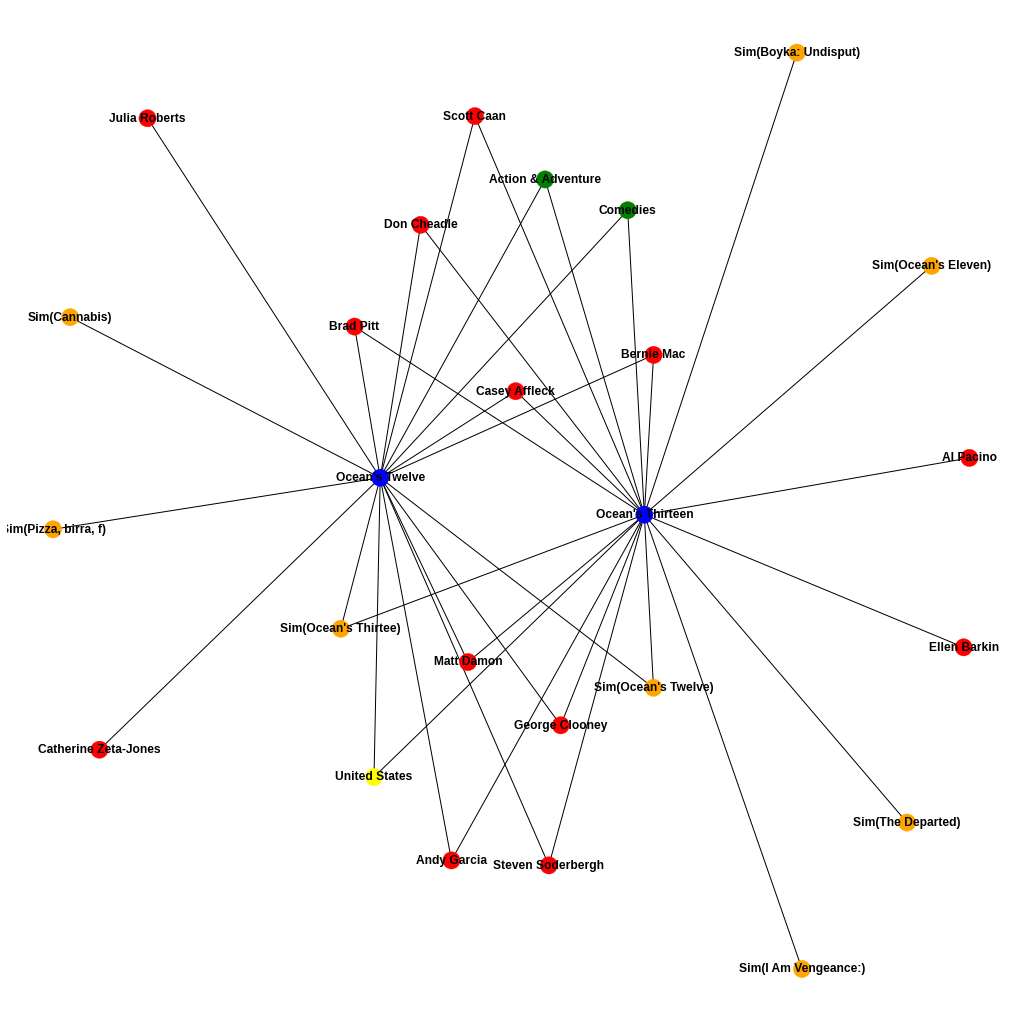

In [ ]:
list_in=["Ocean's Twelve","Ocean's Thirteen"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [ ]:
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)        
    return result;

In [ ]:
result = get_recommendation("Ocean's Twelve")
result2 = get_recommendation("Ocean's Thirteen")
result3 = get_recommendation("The Devil Inside")
result4 = get_recommendation("Stranger Things")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(result.head())
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(result2.head())
print("*"*40+"\n Recommendation for 'Belmonte'\n"+"*"*40)
print(result3.head())
print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(result4.head())

****************************************
 Recommendation for 'Ocean's Twelve'
****************************************
Ocean's Thirteen    7.033613
Ocean's Eleven      1.528732
The Informant!      1.252955
Babel               1.162454
Cannabis            1.116221
dtype: float64
****************************************
 Recommendation for 'Ocean's Thirteen'
****************************************
Ocean's Twelve       7.033613
The Departed         2.232071
Ocean's Eleven       2.086843
Brooklyn's Finest    1.467979
Boyka: Undisputed    1.391627
dtype: float64
****************************************
 Recommendation for 'Belmonte'
****************************************
The Boy                                  1.901648
The Devil and Father Amorth              1.413791
Making a Murderer                        1.239666
Belief: The Possession of Janet Moses    1.116221
I Am Vengeance                           1.116221
dtype: float64
****************************************
 Recommendation 

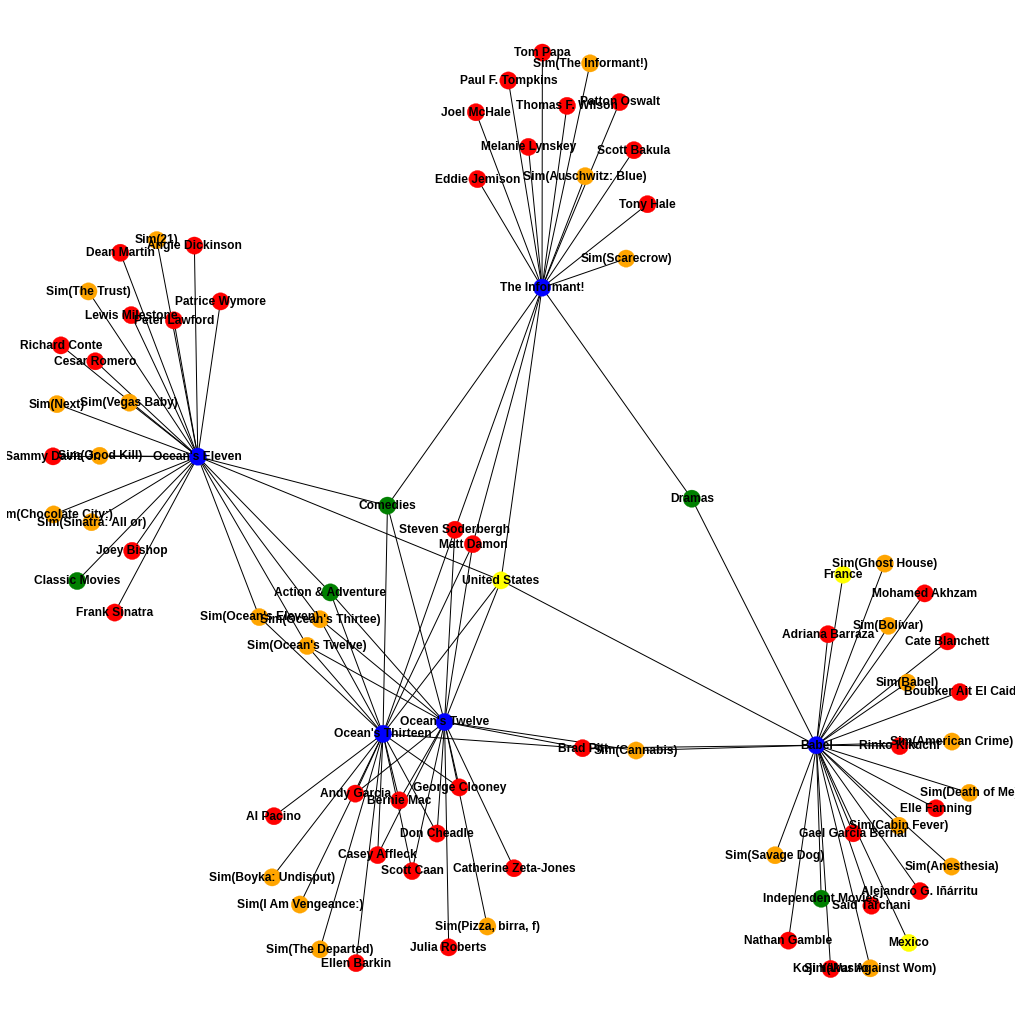

In [ ]:
reco=list(result.index[:4].values)
reco.extend(["Ocean's Twelve"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

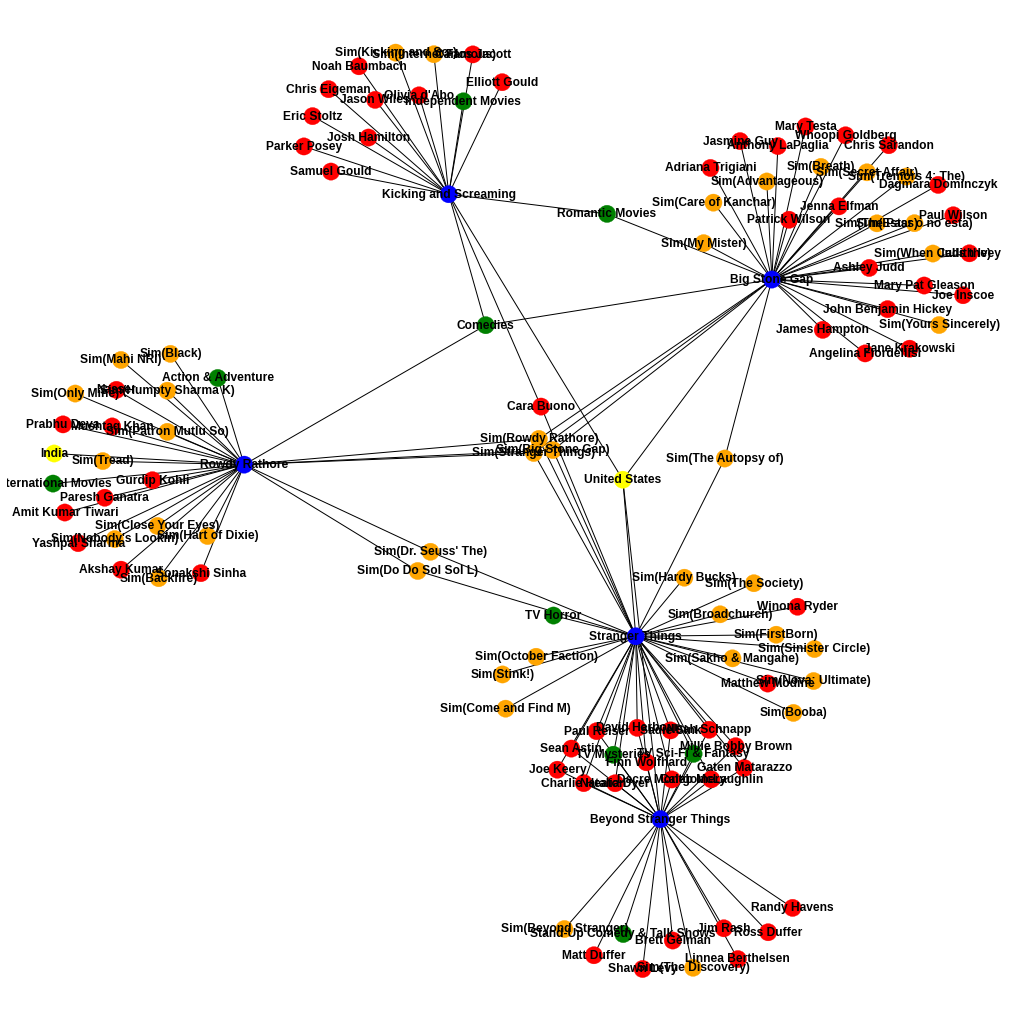

In [ ]:
reco=list(result4.index[:4].values)
reco.extend(["Stranger Things"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

Second method


In [ ]:
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
movies_des = data[data['type'] == 'Movie'].reset_index()
movies_des = movies_des[['title', 'description']]
movies_des.head()

,title,description
0,7:19,After a devastating earthquake hits Mexico Cit...
1,23:59,"When an army recruit is found dead, his fellow..."
2,9,"In a postapocalyptic world, rag-doll robots hi..."
3,21,A brilliant group of students become card-coun...
4,122,"After an awful accident, a couple admitted to ..."


In [ ]:
tv_des = data[data['type'] == 'TV Show'].reset_index()
tv_des = tv_des[['title', 'description']]
tv_des.head()

,title,description
0,3%,In a future where the elite inhabit an island ...
1,46,A genetics professor experiments with a treatm...
2,1983,"In this dark alt-history thriller, a naïve law..."
3,1994,Archival video and new interviews examine Mexi...
4,Feb-09,"As a psychology professor faces Alzheimer's, h..."


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
filtered_movies = []
movies_words = []

for text in movies_des['description']:
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word.lower() for word in text_tokens if not word in stopwords.words()]
    movies_words.append(tokens_without_sw)
    filtered = (" ").join(tokens_without_sw)
    filtered_movies.append(filtered)

movies_words = [val for sublist in movies_words for val in sublist]
movies_words = sorted(set(movies_words))
movies_des['description_filtered'] = filtered_movies
movies_des.head()

,title,description,description_filtered
0,7:19,After a devastating earthquake hits Mexico Cit...,after devastating earthquake hits mexico city ...
1,23:59,"When an army recruit is found dead, his fellow...","when army recruit found dead , fellow soldiers..."
2,9,"In a postapocalyptic world, rag-doll robots hi...","in postapocalyptic world , rag-doll robots hid..."
3,21,A brilliant group of students become card-coun...,a brilliant group students become card-countin...
4,122,"After an awful accident, a couple admitted to ...","after awful accident , couple admitted grisly ..."


In [ ]:
filtered_tv = []
tv_words = []

for text in tv_des['description']:
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word.lower() for word in text_tokens if not word in stopwords.words()]
    tv_words.append(tokens_without_sw)
    filtered = (" ").join(tokens_without_sw)
    filtered_tv.append(filtered)

tv_words = [val for sublist in tv_words for val in sublist]
tv_words = sorted(set(tv_words))
tv_des['description_filtered'] = filtered_tv
tv_des.head()

,title,description,description_filtered
0,3%,In a future where the elite inhabit an island ...,in future elite inhabit island paradise far cr...
1,46,A genetics professor experiments with a treatm...,a genetics professor experiments treatment com...
2,1983,"In this dark alt-history thriller, a naïve law...","in dark alt-history thriller , naïve law stude..."
3,1994,Archival video and new interviews examine Mexi...,archival video new interviews examine mexican ...
4,Feb-09,"As a psychology professor faces Alzheimer's, h...","as psychology professor faces alzheimer 's , d..."


In [ ]:
movie_word_binary = [[0] * 0 for i in range(len(set(movies_words)))]

for des in movies_des['description_filtered']:
    k = 0
    for word in movies_words:
        if word in des:
            movie_word_binary[k].append(1.0)
        else:
            movie_word_binary[k].append(0.0)
        k+=1
        
movie_word_binary = pd.DataFrame(movie_word_binary).transpose()

In [ ]:
tv_word_binary = [[0] * 0 for i in range(len(set(tv_words)))]

for des in tv_des['description_filtered']:
    k = 0
    for word in tv_words:
        if word in des:
            tv_word_binary[k].append(1.0)
        else:
            tv_word_binary[k].append(0.0)
        k+=1
        
tv_word_binary = pd.DataFrame(tv_word_binary).transpose()

In [ ]:
def recommender2(search):
    cs_list = []
    binary_list = []
    if search in movies_des['title'].values:
        idx = movies_des[movies_des['title'] == search].index.item()
        for i in movie_word_binary.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]    
        for j in range(len(movies_des)):
            binary_list2 = []
            for k in movie_word_binary.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        movies_copy = movies_des.copy()
        movies_copy['cos_sim'] = cs_list
        results = movies_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(5)
        return(top_results)
    elif search in tv_des['title'].values:
        idx = tv_des[tv_des['title'] == search].index.item()
        for i in tv_word_binary.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]
        for j in range(len(tv)):
            binary_list2 = []
            for k in tv_word_binary.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        tv_copy = tv_des.copy()
        tv_copy['cos_sim'] = cs_list
        results = tv_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(5)
        return(top_results)
    else:
        return("Title not in dataset. Please check spelling.")

In [ ]:
pd.options.display.max_colwidth = 300
recommender2('The Conjuring')

,title,description,description_filtered,cos_sim
2866,Mirai,"Unhappy after his new baby sister displaces him, four-year-old Kun begins meeting people and pets from his family's history in their unique house.","unhappy new baby sister displaces , four-year-old kun begins meeting people pets family 's history unique house .",0.487417
3766,Sat Sri Akal,"Based on true events, this moving story centers on a Punjabi family whose celebration of their faith endures in the face of conflicting attitudes.","based true events , moving story centers punjabi family whose celebration faith endures conflicting attitudes .",0.487412
1828,Hard Lessons,"This drama based on real-life events tells the story of George McKenna, the tough, determined new principal of a notorious Los Angeles high school.","this drama based real-life events tells story george mckenna , tough , determined new principal notorious los angeles high school .",0.478340
4404,The Eyes of My Mother,"At the remote farmhouse where she once witnessed a traumatic childhood event, a young woman develops a grisly fascination with violence.","at remote farmhouse witnessed traumatic childhood event , young woman develops grisly fascination violence .",0.475474
4029,Standoff,"After witnessing an assassin's slaughter, a young girl holes up in a farmhouse with a suicidal vet, who must use wits and guts to fend off the killer.","after witnessing assassin 's slaughter , young girl holes farmhouse suicidal vet , must use wits guts fend killer .",0.461690


In [ ]:
recommender2("Child's Play")

,title,description,description_filtered,cos_sim
2776,Material,"A dutiful son must hide his pursuit of stand-up comedy from his staunch father, who expects him to inherit his store and uphold their Muslim beliefs.","a dutiful must hide pursuit stand-up comedy staunch father , expects inherit store uphold muslim beliefs .",0.427741
1142,Dark Places,"Years after surviving a brutal crime as a child, Libby Day comes to believe that the brother she testified against for committing it may be innocent.","years surviving brutal crime child , libby day comes believe brother testified committing may innocent .",0.420302
4059,Strange Weather,"A grieving mother takes a road trip with her friend to confront the man who, she believes, stole her late son's business idea to get rich.","a grieving mother takes road trip friend confront , believes , stole late 's business idea get rich .",0.413237
1741,Good People,A struggling couple can't believe their luck when they find a stash of money in the apartment of a neighbor who was recently murdered.,a struggling couple n't believe luck find stash money apartment neighbor recently murdered .,0.408377
4002,Spectral,"When an otherworldly force wreaks havoc on a war-torn European city, an engineer teams up with an elite Special Ops unit to stop it.","when otherworldly force wreaks havoc war-torn european city , engineer teams elite special ops unit stop .",0.407014
